In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
df = pd.read_csv('../data/countries-in-conflict-data.csv')
print(df.head())
print(df.info())

    Country Country Abbreviation  Year  \
0  Abkhazia             OWID_ABK  1989   
1  Abkhazia             OWID_ABK  1990   
2  Abkhazia             OWID_ABK  1991   
3  Abkhazia             OWID_ABK  1992   
4  Abkhazia             OWID_ABK  1993   

   Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all  
0                                                  0                              
1                                                  0                              
2                                                  0                              
3                                                  0                              
4                                                  0                              
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 4 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                         

In [175]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Country                                                                          0
Country Abbreviation                                                             0
Year                                                                             0
Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all    0
dtype: int64


In [176]:
continents = {
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
        "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros",
        "Congo (Republic)", "Congo (Democratic Republic)", "Côte d’Ivoire", "Djibouti",
        "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon",
        "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia",
        "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco",
        "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "São Tomé and Príncipe",
        "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan",
        "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
    ],

    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan",
        "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia",
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait",
        "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar",
        "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar",
        "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", "Taiwan",
        "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates",
        "Uzbekistan", "Vietnam", "Yemen"
    ],

    "Europe": [
        "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina",
        "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland",
        "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo",
        "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco",
        "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal",
        "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain",
        "Sweden", "Switzerland", "Ukraine", "United Kingdom", "Vatican City"
    ],

    "North America": [
        "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica",
        "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala",
        "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama",
        "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
        "Trinidad and Tobago", "United States"
    ],

    "South America": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
        "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
    ],

    "Oceania": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru",
        "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands",
        "Tonga", "Tuvalu", "Vanuatu"
    ],

    "Middle East": [
        "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon",
        "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
    ]
}



In [177]:
#the total number of deaths from ongoing conflicts across all years
total_deaths = df["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum()
print(f"Total Deaths: {total_deaths}")

Total Deaths: 3333147


In [178]:
#the average number of deaths per year
avg_deaths_by_year = df.groupby("Year")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].mean()
print(avg_deaths_by_year.head())

Year
1989    326.521951
1990    465.092683
1991    409.448780
1992    368.487805
1993    329.926829
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: float64


In [179]:
#the top 5 countries with the highest total number of conflict-related deaths
top_countries_by_deaths = df.groupby("Country")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum().nlargest(10)
print(top_countries_by_deaths)

Country
Rwanda                          794913
Syria                           402416
Afghanistan                     315930
Ethiopia                        180528
Eritrea                         139749
Democratic Republic of Congo    126691
Iraq                            126621
Mexico                           94150
Ukraine                          90924
Sri Lanka                        65337
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: int64


In [180]:
#the total deaths for each decade
df["Decade"] = (df["Year"] // 10) * 10
total_deaths_by_decade = df.groupby("Decade")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum()
print(total_deaths_by_decade)

Decade
1980      66937
1990    1500408
2000     402071
2010     920567
2020     443164
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: int64


In [181]:
#the year with the highest total conflict-related deaths
top_year_by_deaths = df.groupby("Year")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum().idxmax()
print(f"Year with Highest Deaths: {top_year_by_deaths}")

Year with Highest Deaths: 1994


In [182]:
#the trend of deaths in the last 10 years
recent_deaths = df[df["Year"] >= 2012].groupby("Year")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum()
print(recent_deaths)

Year
2012     85608
2013    110612
2014    148782
2015    127352
2016    111736
2017    103625
2018     84974
2019     78282
2020     86030
2021    120142
2022    236992
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: int64


In [183]:
#the number of unique countries with ongoing conflicts in 2022
countries_in_2022 = len(df[df["Year"] == 2022]["Country"].unique())
print(f"Countries in Conflict in 2022: {countries_in_2022}")

Countries in Conflict in 2022: 205


In [184]:
#the average number of deaths per country over the dataset period
avg_deaths_by_country = df.groupby("Country")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].mean()
print(avg_deaths_by_country.head())

Country
Abkhazia          0.000000
Afghanistan    9292.058824
Albania           0.647059
Algeria         621.323529
Andorra           0.000000
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: float64


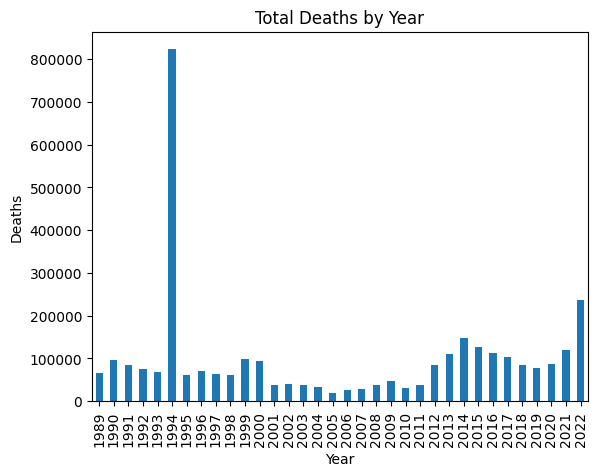

In [185]:
df.groupby("Year")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum().plot(kind="bar")
plt.title("Total Deaths by Year")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.show()

In [186]:
#the 2000s and find top 10 countries by death count
deaths_2000s = df[(df["Year"] >= 2000) & (df["Year"] < 2010)].groupby("Country")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum().nlargest(10)
print(deaths_2000s)

Country
Eritrea                         50090
Afghanistan                     39503
Iraq                            29705
Sri Lanka                       27423
Democratic Republic of Congo    25681
Sudan                           22098
India                           21910
Colombia                        21835
Pakistan                        15131
Nepal                           11549
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: int64


In [187]:
#what percentage of 2020’s global conflict deaths occurred in Iraq, Syria, and Yemen
middle_east_2020 = df[(df["Year"] == 2020) & (df["Country"].isin(["Iraq", "Syria", "Yemen"]))]["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum() / df[df["Year"] == 2020]["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum() * 100
print(f"Percentage of Deaths in Middle East in 2020: {middle_east_2020:.2f}%")

Percentage of Deaths in Middle East in 2020: 15.41%


In [188]:
#the yearly trend of deaths for a specific country (Afghanistan)
country_trend = df[df["Country"] == "Afghanistan"].groupby("Year")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum()
print(country_trend)

Year
1989     5411
1990     1514
1991     3553
1992     4366
1993     4097
1994     9055
1995     5610
1996     3574
1997     6719
1998    12154
1999     5074
2000     5387
2001     5553
2002     1131
2003      922
2004      809
2005     1700
2006     4958
2007     6911
2008     5644
2009     6488
2010     7151
2011     7560
2012     7754
2013     8104
2014    12499
2015    17926
2016    18674
2017    19741
2018    26822
2019    30393
2020    20808
2021    36370
2022     1498
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: int64


In [189]:
#the average conflict-related deaths in African countries
africa_deaths = df[df["Country Abbreviation"].str.contains("OWID_AFR")]["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].mean()
print(f"Average Deaths in African Countries: {africa_deaths}")

Average Deaths in African Countries: nan


In [190]:
#how many years each country had zero reported deaths
zero_deaths_years = df[df["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"] == 0].groupby("Country")["Year"].count()
print(zero_deaths_years.head())

Country
Abkhazia    34
Albania     33
Algeria      3
Andorra     34
Angola      11
Name: Year, dtype: int64


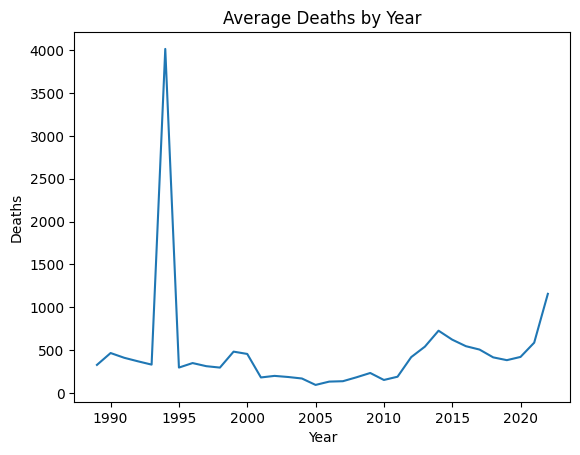

In [191]:
df.groupby("Year")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].mean().plot(kind="line")
plt.title("Average Deaths by Year")
plt.ylabel("Deaths")
plt.show()

In [192]:
#total deaths by country since the year 2000
century_deaths = df[df["Year"] >= 2000].groupby("Country")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum()
print(century_deaths.head())

Country
Abkhazia            0
Afghanistan    254803
Albania             0
Algeria          7528
Andorra             0
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: int64


In [193]:
#the top years with the highest total deaths 
top_1990_to_2022 = df[(df["Year"] >= 1990) & (df["Year"] < 2022)].groupby("Year")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum().nlargest(10)
print(top_1990_to_2022)

Year
1994    822947
2014    148782
2015    127352
2021    120142
2016    111736
2013    110612
2017    103625
1999     98671
1990     95344
2000     93159
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: int64


In [194]:
#how the number of deaths per country in 2022
deaths_2022 = df[df["Year"] == 2022].groupby("Country")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum()
print(deaths_2022)

Country
Abkhazia                      0
Afghanistan                1498
Albania                       0
Algeria                      10
Andorra                       0
                           ... 
Yemen                      3124
Yemen People's Republic       0
Yugoslavia                    0
Zambia                        0
Zimbabwe                      0
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, Length: 205, dtype: int64


In [195]:
#average deaths for countries where conflict has caused at least one death
active_conflict_avg = df[df["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"] > 0].groupby("Country")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].mean()
print(active_conflict_avg.head())

Country
Afghanistan    9292.058824
Albania          22.000000
Algeria         681.451613
Angola         1436.521739
Argentina        86.000000
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: float64


In [196]:
#the yearly trend of conflict deaths in Iraq, Syria, and Yemen (Middle Eas)
middle_east_trend = df[df["Country"].isin(["Iraq", "Syria", "Yemen"])].groupby("Year")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum()
print(middle_east_trend)

Year
1989       57
1990      117
1991    24492
1992      844
1993      431
1994     2460
1995     1347
1996      910
1997     2365
1998       97
1999      311
2000      185
2001       19
2002       86
2003     7993
2004     4383
2005     3511
2006     4582
2007     4489
2008     2791
2009     1810
2010     2054
2011     7054
2012    57401
2013    80935
2014    94596
2015    77272
2016    69495
2017    53189
2018    27806
2019    14799
2020    13255
2021    26181
2022     5517
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: int64


In [197]:
#the number of countries that reported more than 1000 deaths in any given year
high_death_countries = len(df[df["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"] > 1000]["Country"].unique())
print(f"Countries with >1000 Deaths: {high_death_countries}")

Countries with >1000 Deaths: 56


In [198]:
#the percentage of deaths in Africa relative to global deaths in 2010
africa_2010 = df[(df["Year"] == 2010) & (df["Country Abbreviation"].str.contains("OWID_AFR"))]["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum() / df[df["Year"] == 2010]["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum() * 100
print(f"Percentage of Deaths in Africa in 2010: {africa_2010:.2f}%")

Percentage of Deaths in Africa in 2010: 0.00%


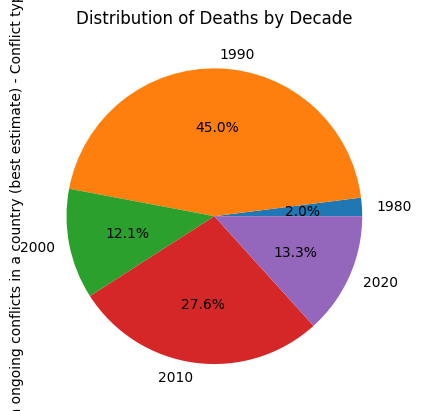

In [199]:
df["Decade"] = (df["Year"] // 10) * 10
df.groupby("Decade")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Deaths by Decade")
plt.show()

In [200]:
#tdeaths for each country during the 2020s
deaths_2020s = df[df["Year"] >= 2020].groupby("Country")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum()
print(deaths_2020s.head())

Country
Abkhazia           0
Afghanistan    58676
Albania            0
Algeria           53
Andorra            0
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: int64


In [201]:
#the total deaths in countries with active conflicts during the 2000s
deaths_2000s_active = df[(df["Year"] >= 2000) & (df["Year"] < 2010) & (df["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"] > 0)].groupby("Country")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum()
print(deaths_2000s_active.head())

Country
Afghanistan    39503
Algeria         6031
Angola          4027
Armenia            2
Azerbaijan        53
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: int64


In [202]:
#Compare deaths in 2010 vs 2020 and find countries with the highest increase
deaths_2010 = df[df["Year"] == 2010].set_index("Country")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"]
deaths_2020 = df[df["Year"] == 2020].set_index("Country")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"]
diff_deaths = (deaths_2020 - deaths_2010).nlargest(5)
print(diff_deaths)

Country
Afghanistan    13657
Mexico         12754
Azerbaijan      7634
Yemen           6511
Syria           5632
Name: Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all, dtype: int64


In [203]:
#the total number of conflict-related deaths for each continent from 1989 to 2022
continent_deaths = {
    continent: df[df["Country"].isin(countries)]["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum()
    for continent, countries in continents.items()}

for continent, deaths in continent_deaths.items():
    print(f"{continent}: {deaths:,} deaths")

Africa: 1,589,905 deaths
Asia: 1,236,198 deaths
Europe: 191,201 deaths
North America: 108,961 deaths
South America: 59,085 deaths
Oceania: 654 deaths
Middle East: 613,035 deaths


In [204]:
#average annual conflict-related deaths per continent from 1989 to 2022
continent_avg_deaths = {}
for continent, countries in continents.items():
    yearly_avg = df[df["Country"].isin(countries)] \
        .groupby("Year")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"] \
        .mean()
    
    continent_avg_deaths[continent] = yearly_avg.mean()
print("Average Annual Deaths per Continent (1989–2022):\n")
for continent, avg_deaths in continent_avg_deaths.items():
    print(f"{continent}: {avg_deaths:,.2f} deaths/year")


Average Annual Deaths per Continent (1989–2022):

Africa: 954.32 deaths/year
Asia: 757.47 deaths/year
Europe: 130.78 deaths/year
North America: 139.34 deaths/year
South America: 144.82 deaths/year
Oceania: 1.48 deaths/year
Middle East: 1,287.89 deaths/year


In [205]:
# the continent with the Highest Total Deaths
max_continent = max(continent_deaths, key=continent_deaths.get)
print(f"Continent with Highest Deaths: {max_continent} ({continent_deaths[max_continent]})")

Continent with Highest Deaths: Africa (1589905)


In [206]:
#the average number of conflict-related deaths per year (2000–2022) for each continent
century_deaths_by_continent = {}
for continent, countries in continents.items():
    # Filter data for each continent and years 2000 to 2022
    filtered_df = df[(df["Year"] >= 2000) & (df["Country"].isin(countries))]
    century_deaths_by_continent[continent] = filtered_df["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].mean()
    
print("Average Annual Conflict Deaths (2000–2022) by Continent:\n")
for continent, avg_deaths in century_deaths_by_continent.items():
    print(f"{continent}: {avg_deaths:,.2f} deaths/year")


Average Annual Conflict Deaths (2000–2022) by Continent:

Africa: 405.84 deaths/year
Asia: 907.66 deaths/year
Europe: 105.87 deaths/year
North America: 185.73 deaths/year
South America: 141.24 deaths/year
Oceania: 0.94 deaths/year
Middle East: 1,779.62 deaths/year


In [207]:
#Average Deaths in the 21st Century (2000–2022)
century_deaths_by_continent = {}
for continent, countries in continents.items():
    filtered_df = df[(df["Year"] >= 2000) & (df["Country"].isin(countries))]  
    century_deaths_by_continent[continent] = filtered_df[
        "Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].mean()

print("Average Conflict-Related Deaths per Year (2000–2022):\n")
for continent, avg in century_deaths_by_continent.items():
    print(f"{continent}: {avg:,.2f} deaths/year")


Average Conflict-Related Deaths per Year (2000–2022):

Africa: 405.84 deaths/year
Asia: 907.66 deaths/year
Europe: 105.87 deaths/year
North America: 185.73 deaths/year
South America: 141.24 deaths/year
Oceania: 0.94 deaths/year
Middle East: 1,779.62 deaths/year


In [208]:
#Percentage of Deaths per Continent from Global Total
total_global_deaths = df["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum()
death_percentage = {
    continent: (deaths / total_global_deaths) * 100
    for continent, deaths in continent_deaths.items()}
print("Percentage Share of Global Conflict-Related Deaths (1989–2022):\n")
for continent, percent in death_percentage.items():
    print(f"{continent}: {percent:.2f}% of global total")

Percentage Share of Global Conflict-Related Deaths (1989–2022):

Africa: 47.70% of global total
Asia: 37.09% of global total
Europe: 5.74% of global total
North America: 3.27% of global total
South America: 1.77% of global total
Oceania: 0.02% of global total
Middle East: 18.39% of global total


In [209]:
#the top 3 Countries by Deaths in Each Continent
top_countries_by_continent = {}
for continent, countries in continents.items():
    deaths_by_country = (
        df[df["Country"].isin(countries)]
        .groupby("Country")["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"]
        .sum().nlargest(3))
    top_countries_by_continent[continent] = deaths_by_country
print("Top 3 Countries by Conflict Deaths in Each Continent (1989–2022):\n")
for continent, series in top_countries_by_continent.items():
    print(f"{continent}:")
    for country, deaths in series.items():
        print(f"   - {country}: {deaths:,} deaths")
    print()

Top 3 Countries by Conflict Deaths in Each Continent (1989–2022):

Africa:
   - Rwanda: 794,913 deaths
   - Ethiopia: 180,528 deaths
   - Eritrea: 139,749 deaths

Asia:
   - Syria: 402,416 deaths
   - Afghanistan: 315,930 deaths
   - Iraq: 126,621 deaths

Europe:
   - Ukraine: 90,924 deaths
   - Bosnia and Herzegovina: 65,122 deaths
   - Russia: 24,620 deaths

North America:
   - Mexico: 94,150 deaths
   - El Salvador: 5,983 deaths
   - United States: 3,032 deaths

South America:
   - Colombia: 35,366 deaths
   - Brazil: 13,922 deaths
   - Peru: 7,446 deaths

Oceania:
   - Papua New Guinea: 650 deaths
   - Australia: 2 deaths
   - Solomon Islands: 2 deaths

Middle East:
   - Syria: 402,416 deaths
   - Iraq: 126,621 deaths
   - Yemen: 63,797 deaths



In [210]:
#Comparing 1990s vs 2010s Deaths per Continent
decade_comparison = {}
for continent, countries in continents.items():
    deaths_1990s = df[
        (df["Year"] >= 1990) & (df["Year"] < 2000) & df["Country"].isin(countries)
    ]["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum()
    deaths_2010s = df[
        (df["Year"] >= 2010) & (df["Year"] < 2020) & df["Country"].isin(countries)
    ]["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].sum()
    decade_comparison[continent] = {"1990s": deaths_1990s, "2010s": deaths_2010s}

print(" Comparison of Conflict Deaths: 1990s vs. 2010s by Continent\n")
for continent, data in decade_comparison.items():
    print(f" {continent}:")
    print(f"    1990s: {data['1990s']:,} deaths")
    print(f"    2010s: {data['2010s']:,} deaths\n")

 Comparison of Conflict Deaths: 1990s vs. 2010s by Continent

 Africa:
    1990s: 1,091,785 deaths
    2010s: 136,774 deaths

 Asia:
    1990s: 218,011 deaths
    2010s: 704,530 deaths

 Europe:
    1990s: 86,011 deaths
    2010s: 10,443 deaths

 North America:
    1990s: 3,799 deaths
    2010s: 35,974 deaths

 South America:
    1990s: 17,597 deaths
    2010s: 9,172 deaths

 Oceania:
    1990s: 372 deaths
    2010s: 87 deaths

 Middle East:
    1990s: 38,803 deaths
    2010s: 490,210 deaths



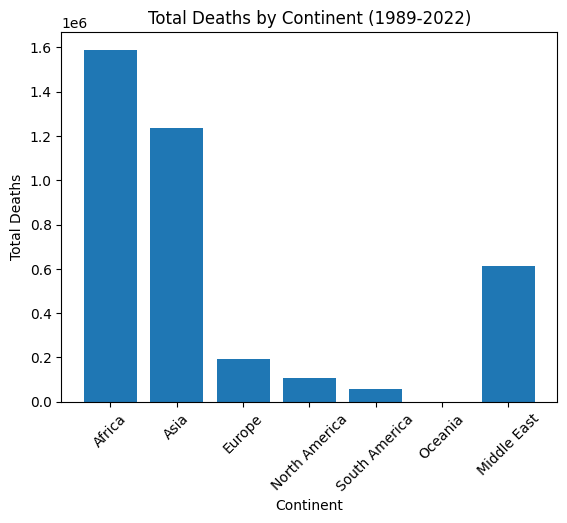

In [211]:
plt.bar(continent_deaths.keys(), continent_deaths.values())
plt.title("Total Deaths by Continent (1989-2022)")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.show()

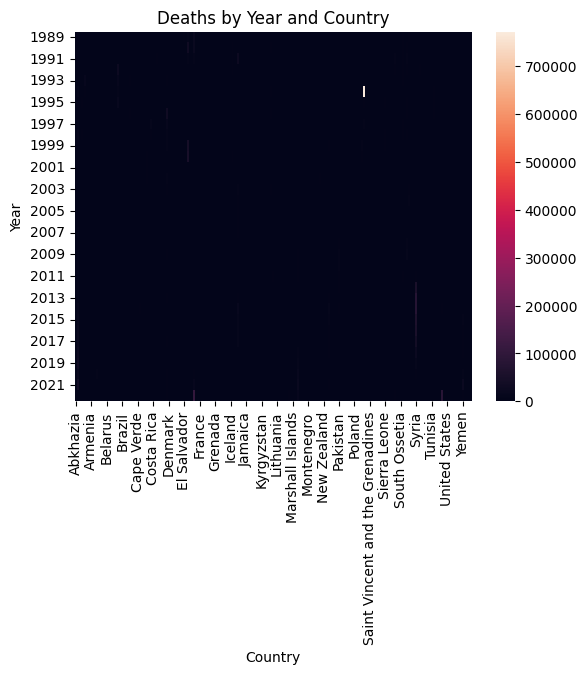

In [212]:
pivot = df.pivot_table(values="Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all", index="Year", columns="Country", aggfunc="sum")
sns.heatmap(pivot)
plt.title("Deaths by Year and Country")
plt.show()